#**1: Introduction**
In this kernel we will try to perform exploratory data analysis and build machine learning model to Predict Gold Price. it will be supervised machine learning and this model will try to solve the regression problem like predict the gold prices based on other stock prices.

# **2: Data Description**

This is the gold price dataset. The dataset gives you information about a gold prices based on serveral other stock prices as given below in which you will have to analyze the gold price and build best machine learning model to predict the gold price.

#**3: Data set columns**


*   Date - mm/dd/yyyy
*   SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.
*   GLD - Gold Price
*   USO - United States Oil Fund
*   SLV - Silver Price
*   EUR/USD - currency pair quotation of the Euro against the US









#**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#**Read Data**

In [2]:
data = pd.read_csv("/content/gld_price_data.csv" , encoding='utf-8-sig' )


#**Show Data**

In [6]:
data.head(-10)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099
...,...,...,...,...,...,...
2275,4/19/2018,2693.129883,127.599998,13.770000,16.260,1.234553
2276,4/23/2018,2670.290039,125.620003,13.920000,15.670,1.220897
2277,4/24/2018,2634.560059,126.230003,13.680000,15.760,1.224140
2278,4/25/2018,2639.399902,125.410004,13.720000,15.610,1.217167


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Notes** : No missing Value and all data have data type float number expect Date it is a object instead of drop date we can benfit from it we can doing three columns day , month , year and drop date

In [8]:
data['Date'] = pd.to_datetime(data['Date'])
data['day'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

In [9]:
data.head(-10)


,Date,SPX,GLD,USO,SLV,EUR/USD,day,month,year
0,2008-01-02,1447.160034,84.860001,78.470001,15.180,1.471692,2,1,2008
1,2008-01-03,1447.160034,85.570000,78.370003,15.285,1.474491,3,1,2008
2,2008-01-04,1411.630005,85.129997,77.309998,15.167,1.475492,4,1,2008
3,2008-01-07,1416.180054,84.769997,75.500000,15.053,1.468299,7,1,2008
4,2008-01-08,1390.189941,86.779999,76.059998,15.590,1.557099,8,1,2008
...,...,...,...,...,...,...,...,...,...
2275,2018-04-19,2693.129883,127.599998,13.770000,16.260,1.234553,19,4,2018
2276,2018-04-23,2670.290039,125.620003,13.920000,15.670,1.220897,23,4,2018
2277,2018-04-24,2634.560059,126.230003,13.680000,15.760,1.224140,24,4,2018
2278,2018-04-25,2639.399902,125.410004,13.720000,15.610,1.217167,25,4,2018


**Now We can drop Colum date**



In [10]:
data.drop(['Date'],axis=1, inplace=True)

In [11]:
print("Data Shape " + str (data.shape) )
print("*****************************")
print("Feature name " + str (data.columns) )

Data Shape (2290, 8)
*****************************
Feature name Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD', 'day', 'month', 'year'], dtype='object')


# describe df Matematical and statisctial Operations


In [12]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD,day,month,year
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653,15.644541,6.329258,2012.724891
std,519.111540,23.283346,19.523517,7.092566,0.131547,8.746132,3.591149,2.993271
min,676.530029,70.000000,7.960000,8.850000,1.039047,1.000000,1.000000,2008.000000
25%,1239.874969,109.725000,14.380000,15.570000,1.171313,8.000000,3.000000,2010.000000
50%,1551.434998,120.580002,33.869999,17.268500,1.303297,15.500000,6.000000,2013.000000
75%,2073.010070,132.840004,37.827501,22.882500,1.369971,23.000000,10.000000,2015.000000
max,2872.870117,184.589996,117.480003,47.259998,1.598798,31.000000,12.000000,2018.000000


# describe df Matematical and statisctial Operations


Text(0.5, 1.05, 'Correlation of data Features')

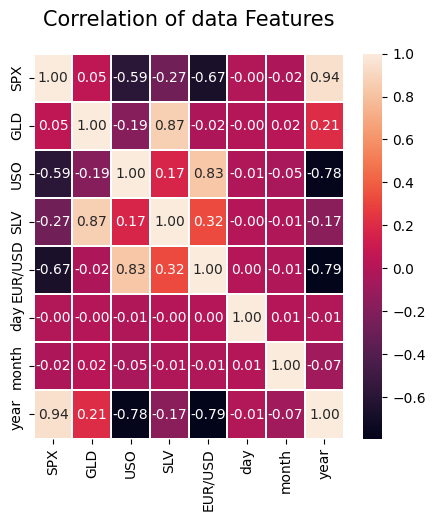

In [13]:
corr = data.corr()
plt.figure(figsize = (5,5))
sns.heatmap(corr ,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           annot=True,fmt='.2f',linewidths=0.30
           )
plt.title('Correlation of data Features', y = 1.05, size=15)

#the correlation score with Output(Price)

In [14]:
print (corr['GLD'].sort_values(ascending=False), '\n')


GLD        1.000000
SLV        0.866632
year       0.206654
SPX        0.049345
month      0.020494
day       -0.000198
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



Day it has a negative impact to a large degree on the output, so dropping it is better and we will keep the months and years that have a strong relationship

In [15]:
data.drop(['day'],axis=1, inplace=True)


**kurtosis**

* is a statistical measure that is used to describe distribution

**Skewness**

* refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed. Skewness can be quantified as a representation of the extent to which a given distribution varies from a normal distribution. A normal distribution has a skew of zero, while a lognormal distribution, for example, would exhibit some degree of right-skew

#Lets Check our target variable

<ipython-input-16-b7aec8bac934>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'], color = 'blue')


Skewness: %f 0.3341383472692508
Kurtosis: -0.275081


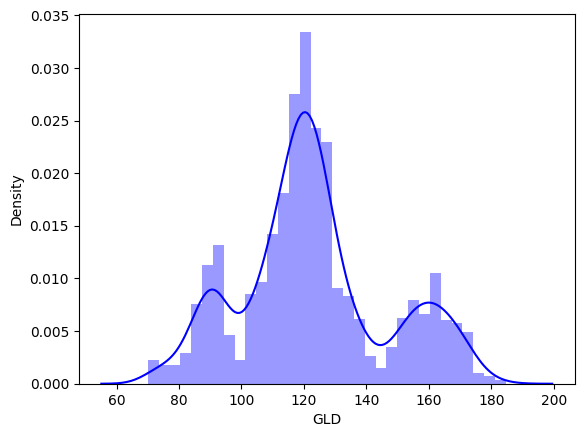

In [16]:
sns.distplot(data['GLD'], color = 'blue')
print('Skewness: %f', data['GLD'].skew())
print("Kurtosis: %f" % data['GLD'].kurt())

# Relation betwen data with GLd

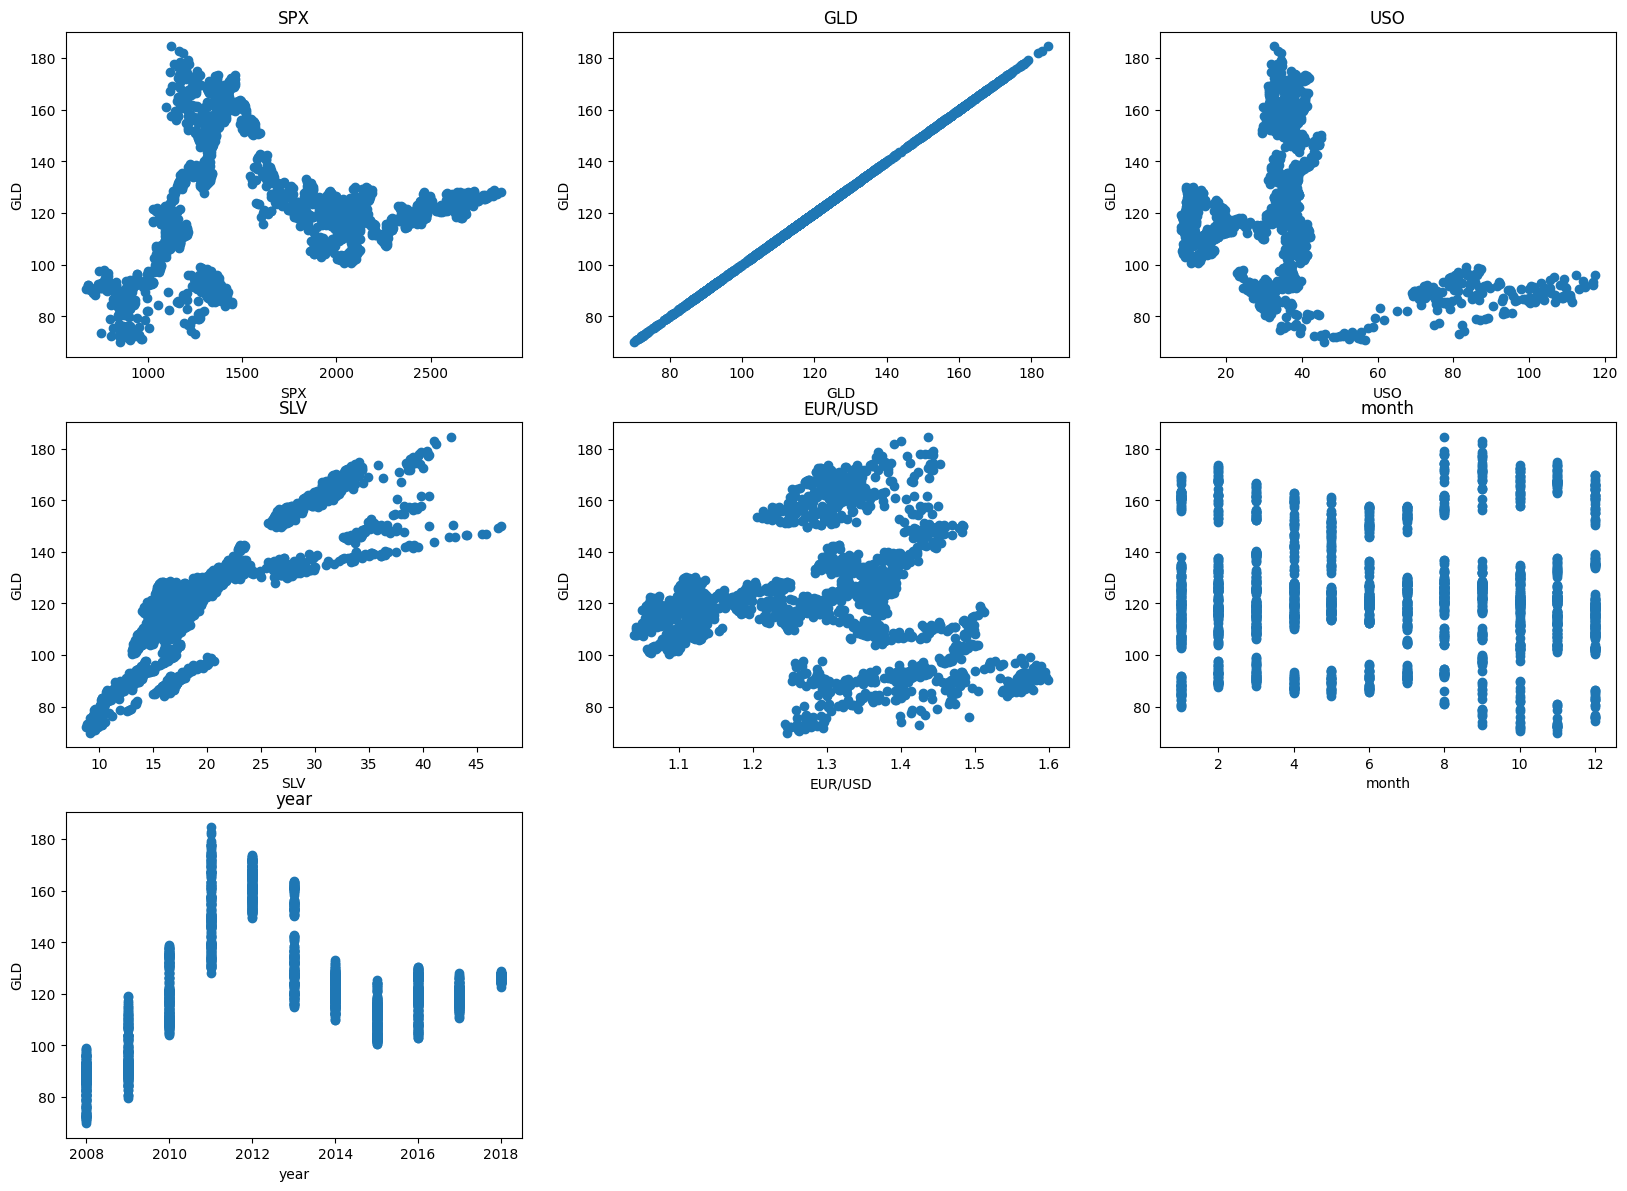

In [17]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in data:
    data=data.copy()
    ax = plt.subplot(12,3,plotnumber)
    plt.scatter(data[feature],data['GLD'])
    plt.xlabel(feature)
    plt.ylabel('GLD')
    plt.title(feature)
    plotnumber+=1
plt.show()

#Split Dataset into Training set and Test set



In [29]:
X = data.drop(['GLD'],axis=1)
y = data['GLD']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

#Model Selection



In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

In [34]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'RandomForestRegressor':{
        'model':RandomForestRegressor(),
        'params':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['squared_error'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    },
    'XGBRegressor':{
        'model':XGBRegressor(),
        'params':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [2, 3],
            'n_estimators': [10, 50, 100, 200]
        }
    },
    'KNN':{
        'model':KNeighborsRegressor(),
        'params':{
            'n_neighbors':[5,7],
            'algorithm':['auto']
        }
    },
    'SVR':{
        'model':SVR(),
        'params':{
            'C': [1.0],
            'epsilon':[0.1],
            'kernel' :['rbf']
        }
    }

    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [35]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,decision_tree,0.994386,"{'criterion': 'friedman_mse', 'splitter': 'random'}"
1,RandomForestRegressor,0.902380,"{'criterion': 'squared_error', 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 50}"
2,XGBRegressor,0.994140,"{'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 200}"
3,KNN,0.943670,"{'algorithm': 'auto', 'n_neighbors': 5}"
4,SVR,-0.002427,"{'C': 1.0, 'epsilon': 0.1, 'kernel': 'rbf'}"


**Notes : Best Model is XGBRegressor So , We Build this model**

In [36]:
model_XGBRegressor = XGBRegressor(learning_rate=0.5, max_depth=3, n_estimators=200)


In [37]:
model_XGBRegressor.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Calculating Details

In [39]:
print('Model XGBRegressor Train Score is : ' , model_XGBRegressor.score(X_train, y_train))
print('Model XGBRegressor Test Score is : ' , model_XGBRegressor.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = model_XGBRegressor.predict(X_test)
print("------------------- Manual Compare ----------------")
print('Real Value is : ' , list(y_test[:10]))
print('Predicted Value is :', y_pred[:10])

Model XGBRegressor Train Score is :  0.9991237931145734
Model XGBRegressor Test Score is :  0.9954184191712927
----------------------------------------------------
------------------- Manual Compare ----------------
Real Value is :  [122.32, 129.899994, 126.980003, 96.5, 117.580002, 115.0, 125.440002, 116.93, 108.220001, 98.830002]
Predicted Value is : [122.62246  129.83722  128.34332   96.12383  117.07152  114.94472
 125.42964  117.493416 107.489746  98.6359  ]


#Now Check the error for regression

In [40]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   1.123419962440724
MSE :   2.5120802903642963
RMAE :   1.5849543496152487
